In [1]:
### 不同的importance type对应结果

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import eli5
from eli5.sklearn import PermutationImportance

In [14]:
from matplotlib import pyplot as plt

In [3]:
path = "../3_data/featimp/nu/multi"

In [7]:
importance_type = ['weight', 'gain', 'cover', 'total_cover', 'total_gain']

In [11]:
for impt in importance_type:
    df = pd.read_csv(path+"/xgb_"+impt+"_imp.csv")
    df =df[df[impt]>=0.01]
    print(df.head())

         feature    weight
0    katG_944G>C  0.051256
1   rpoB_1349C>T  0.044517
2   embR_1114T>G  0.037982
3  ponA1_1891C>T  0.025526
4    embB_916A>G  0.025322
        feature      gain
0   katG_944G>C  0.234670
1  rpoB_1349C>T  0.098610
2  rpoB_1304A>T  0.025053
3   ponA1_17C>T  0.023950
4  rpoB_2283G>C  0.022414
        feature     cover
0   katG_944G>A  0.018325
1   inhA_751C>G  0.012325
2  gyrA_1387G>T  0.012249
3  rpoB_1304A>T  0.012084
4   embB_918G>C  0.011342
        feature  total_cover
0   katG_944G>C     0.054522
1  rpoB_1349C>T     0.036334
2   embB_918G>A     0.031268
3   embB_916A>G     0.027611
4  embB_1490A>G     0.023427
                    feature  total_gain
0               katG_944G>C    0.443876
1              rpoB_1349C>T    0.254534
2               embB_916A>G    0.024154
3              rpoB_1304A>T    0.015375
4  ponA1_1886_1887insTCCGCC    0.011402


In [38]:
dt = {}
for impt in importance_type:
    df = pd.read_csv(path+"/xgb_"+impt+"_imp.csv")
    df =df[df[impt]>=0.01]
    dt[impt] = df.feature.values.tolist()

In [39]:
dt

{'weight': ['katG_944G>C',
  'rpoB_1349C>T',
  'embR_1114T>G',
  'ponA1_1891C>T',
  'embB_916A>G',
  'embB_918G>A',
  'ponA1_1886_1887insTCCGCCGCC',
  'embB_1490A>G',
  'embA_228C>T',
  'embR_1126T>C',
  'gyrA_281A>G',
  'embA_114A>G',
  'ponA1_1886_1887insTCCGCC',
  'ponA1_732A>G',
  'ponA1_1893_1894insTCG',
  'embC_2614C>G',
  'embB_918G>C',
  'ponA1_1891_1893delCCG',
  'rpoB_1333C>T',
  'embB_1217G>A',
  'rmlD_846G>C',
  'embC_2960T>G',
  'rpoB_1333C>G',
  'embC_2563C>G',
  'manB_388C>G',
  'rpoB_3030C>G',
  'rpoB_1304A>T',
  'fabG1_609G>A',
  'katG_1388G>T',
  'gyrA_269C>T',
  'embR_1116T>C'],
 'gain': ['katG_944G>C',
  'rpoB_1349C>T',
  'rpoB_1304A>T',
  'ponA1_17C>T',
  'rpoB_2283G>C',
  'katG_944G>A',
  'embB_916A>G',
  'gyrB_1167C>T',
  'ponA1_1886_1887insTCCGCC',
  'rmlD_846G>C',
  'rpoB_1302G>C',
  'rpsA_1142C>T',
  'rpoB_1333C>G'],
 'cover': ['katG_944G>A',
  'inhA_751C>G',
  'gyrA_1387G>T',
  'rpoB_1304A>T',
  'embB_918G>C',
  'embB_1217G>C',
  'gyrA_271T>C',
  'rpoB_1349C>

In [41]:
drug = ['isoniazid', 'rifampicin', 'ethambutol', 'pyrazinamide']
list(map(lambda x:x.upper(), drug))

['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']

In [ ]:
plt.subplot(2,2,1) #要生成两行两列，这是第一个图plt.subplot('行','列','编号')
plt.plot(t,s,'b--')
plt.ylabel('y1')
plt.subplot(2,2,2) #两行两列,这是第二个图
plt.plot(2*t,s,'r--')
plt.ylabel('y2')
plt.subplot(2,2,3)#两行两列,这是第三个图
plt.plot(3*t,s,'m--')
plt.subplot(2,2,4)#两行两列,这是第四个图
plt.plot(4*t,s,'k--')
plt.show()

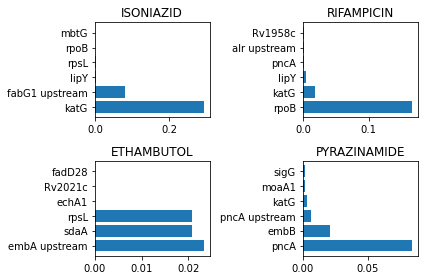

In [58]:
drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/perimp/gene/gene/single/"
for i, d in enumerate(drug):
    df = pd.read_csv(path+str(d)+"_xgb.csv")[:6]
    plt.subplot(2,2,i+1)
    plt.barh(df.feature, df.weight)
    plt.title(d)
plt.tight_layout()
plt.savefig(path+"fisrtdrug.png", bbox_inches='tight',dpi=300)
plt.show()

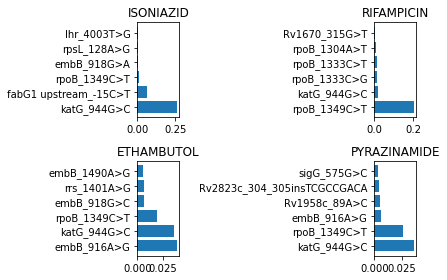

In [59]:
## permutation

drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/perimp/nu/single/"
for i, d in enumerate(drug):
    df = pd.read_csv(path+str(d)+"_xgb_perm.csv")[:6]
    plt.subplot(2,2,i+1)
    plt.barh(df.feature, df.weight)
    plt.title(d)
plt.tight_layout()
plt.savefig(path+"fisrtdrug.png", bbox_inches='tight',dpi=300)
plt.show()

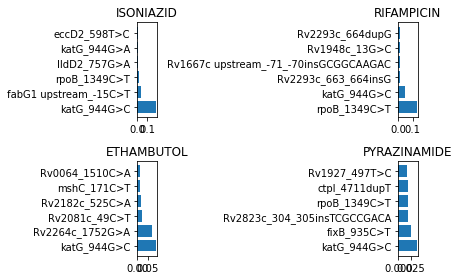

In [64]:
## xgb_feature importance
drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/featimp/nu/single/"
for i, d in enumerate(drug):
    df = pd.read_csv(path+str(d)+"_xgb_imp.csv")[:6]
    plt.subplot(2,2,i+1)
    plt.barh(df.name, df.importance)
    plt.title(d)
plt.tight_layout()
# plt.savefig(path+"xgb_imp.png", bbox_inches='tight',dpi=300)
plt.show()

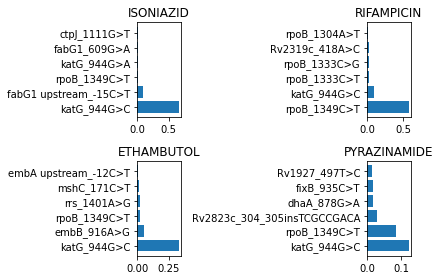

In [65]:
## xgb_feature importance
drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/featimp/nu/single/"
for i, d in enumerate(drug):
    df = pd.read_csv(path+str(d)+"_rf_imp.csv")[:6]
    plt.subplot(2,2,i+1)
    plt.barh(df.name, df.importance)
    plt.title(d)
plt.tight_layout()
# plt.savefig(path+"xgb_imp.png", bbox_inches='tight',dpi=300)
plt.show()

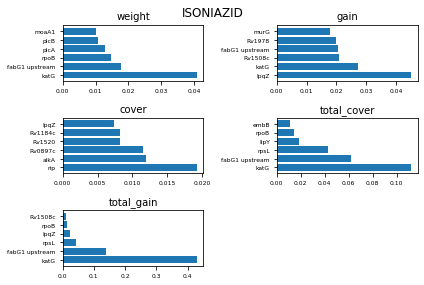

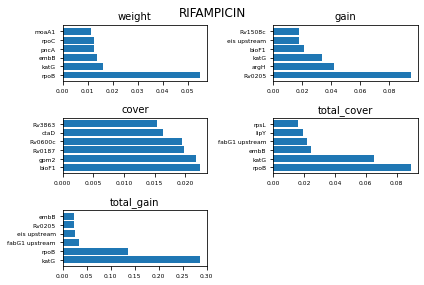

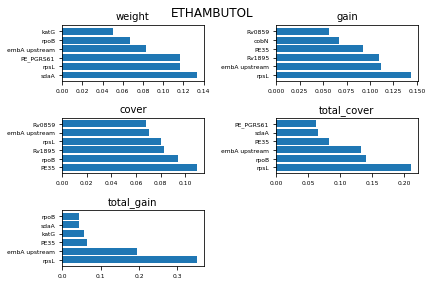

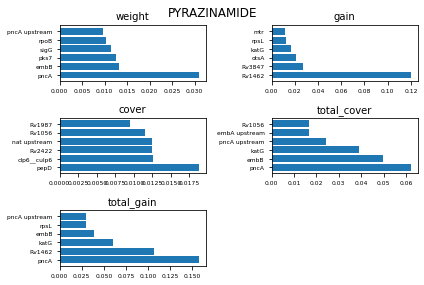

In [83]:
## xgb_feature importance
drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/featimp/imptype/gene/"
for ii, d in enumerate(drug):
    for i, impt in enumerate(importance_type):
        plt.subplot(3,2,i+1)
        df = pd.read_csv(path+"xgb_"+impt+"_"+str(d)+".csv")[:6]
#         plt.subplot(2,2,i+1)
        plt.barh(df.feature, df[impt])
        plt.title(impt)
        plt.title(impt, fontsize=10)
        plt.tick_params(labelsize=6)
    plt.tight_layout()
    plt.suptitle(d)
    plt.savefig(path+str(d)+".png", bbox_inches='tight',dpi=300)
    plt.show()

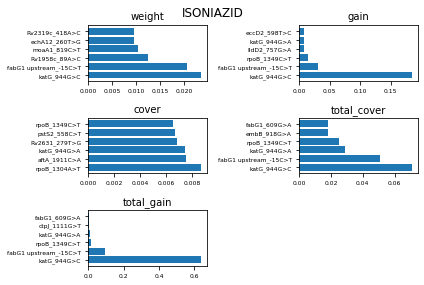

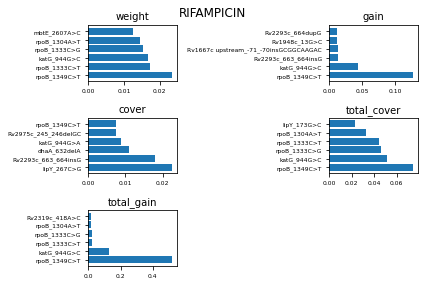

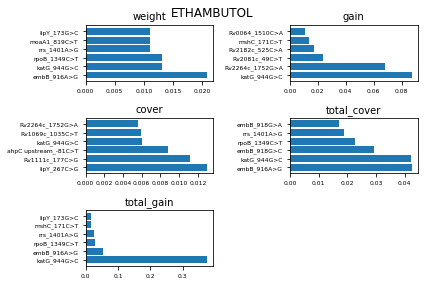

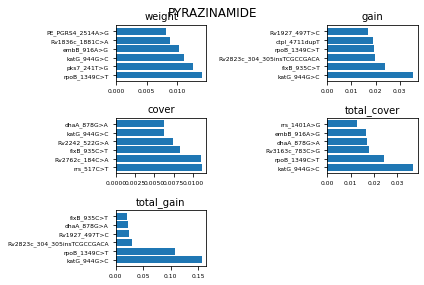

In [82]:
## xgb_feature importance
drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/featimp/imptype/nu/"
for ii, d in enumerate(drug):
    for i, impt in enumerate(importance_type):
        plt.subplot(3,2,i+1)
        df = pd.read_csv(path+"xgb_"+impt+"_"+str(d)+".csv")[:6]
#         plt.subplot(2,2,i+1)
        plt.barh(df.feature, df[impt])
        plt.title(impt, fontsize=10)
        plt.tick_params(labelsize=6)
    plt.tight_layout()
    plt.suptitle(d)
    plt.savefig(path+str(d)+".png", bbox_inches='tight',dpi=300)
    plt.show()

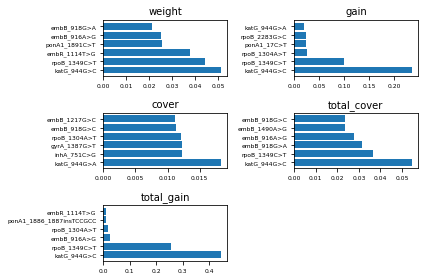

In [88]:
##multi

path  = "../3_data/featimp/nu/multi/"
for i, impt in enumerate(importance_type):
    plt.subplot(3,2,i+1)
    df = pd.read_csv(path+"xgb_"+impt+"_imp.csv")[:6]
#         plt.subplot(2,2,i+1)
    plt.barh(df.feature, df[impt])
    plt.title(impt, fontsize=10)
    plt.tick_params(labelsize=6)
plt.tight_layout()
# plt.suptitle(d)
plt.savefig(path+"multi.png", bbox_inches='tight',dpi=300)
plt.show()

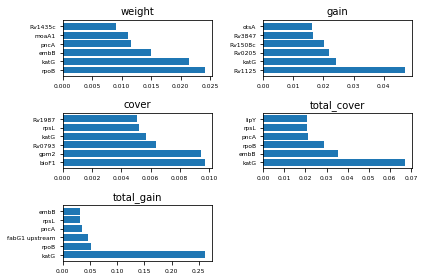

In [89]:
##multi

path  = "../3_data/featimp/gene/multi/"
for i, impt in enumerate(importance_type):
    plt.subplot(3,2,i+1)
    df = pd.read_csv(path+"xgb_"+impt+"_imp.csv")[:6]
#         plt.subplot(2,2,i+1)
    plt.barh(df.feature, df[impt])
    plt.title(impt, fontsize=10)
    plt.tick_params(labelsize=6)
plt.tight_layout()
# plt.suptitle(d)
plt.savefig(path+"multi.png", bbox_inches='tight',dpi=300)
plt.show()

In [91]:
#### permutation vs feature importance

In [129]:
## permutation
impt = ['weight', 'cover', 'gain', 'total_gain', 'total_cover']

drug = ['AMIKACIN',
 'CAPREOMYCIN',
 'CIPROFLOXACIN',
 'ETHAMBUTOL',
 'ETHIONAMIDE',
 'ISONIAZID',
 'KANAMYCIN',
 'MOXIFLOXACIN',
 'OFLOXACIN',
 'PROTHIONAMIDE',
 'PYRAZINAMIDE',
 'RIFABUTIN',
 'RIFAMPICIN',
 'STREPTOMYCIN']

res1 = pd.DataFrame()
# drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/perimp/nu/single/"
for i, d in enumerate(drug):
    dt = {}
    df = pd.read_csv(path+str(d)+"_xgb_perm.csv")[:30]
    ans1 = set(df.feature.values)
    for pt in impt:
        df2 = pd.read_csv(f"../3_data/featimp/imptype/nu/xgb_{pt}_{d}.csv")[:30]
        ans2 = set(df2.feature.values)
        dt[f"pert&{pt}"] = len(ans1 & ans2)
    res1 = res1.append(pd.Series(dt, name=d))
# plt.tight_layout()
# plt.savefig(path+"fisrtdrug.png", bbox_inches='tight',dpi=300)
# plt.show()
res1

,pert&cover,pert&gain,pert&total_cover,pert&total_gain,pert&weight
AMIKACIN,7.0,4.0,15.0,20.0,15.0
CAPREOMYCIN,3.0,2.0,14.0,18.0,16.0
CIPROFLOXACIN,18.0,18.0,17.0,18.0,14.0
ETHAMBUTOL,3.0,10.0,20.0,14.0,17.0
ETHIONAMIDE,2.0,4.0,20.0,19.0,18.0
ISONIAZID,11.0,12.0,17.0,23.0,20.0
KANAMYCIN,8.0,9.0,20.0,21.0,22.0
MOXIFLOXACIN,10.0,11.0,18.0,17.0,13.0
OFLOXACIN,8.0,8.0,16.0,16.0,17.0
PROTHIONAMIDE,5.0,3.0,19.0,18.0,13.0


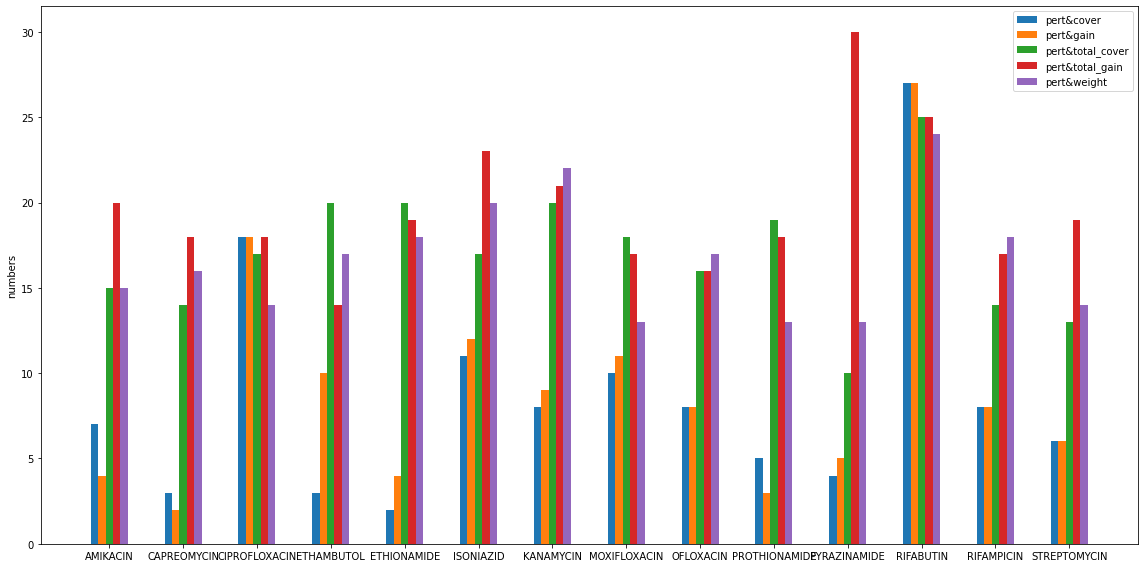

In [130]:
barx = np.arange(len(drug))-0.2    # x坐标
width = 0; wid = 0.1
label_y =res1.columns

plt.figure(figsize=(16,8))
for i in range(len(impt)):  # 遍历每个yj的系数
    plt.bar(barx+width, res1.iloc[:, i], width=wid, label=label_y[i])
    width += wid            # 
plt.xticks(range(len(drug)), drug)
plt.ylabel("numbers")
plt.legend()
plt.tight_layout()
plt.savefig("pert&impt&nu.png", bbox_inches='tight',dpi=300)
plt.show()

In [131]:

res2 = pd.DataFrame()
# drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/perimp/gene/single/"
for i, d in enumerate(drug):
    dt = {}
    df = pd.read_csv(path+str(d)+"_xgb.csv")[:30]
    ans1 = set(df.feature.values)
    for pt in impt:
        df2 = pd.read_csv(f"../3_data/featimp/imptype/gene/xgb_{pt}_{d}.csv")[:30]
        ans2 = set(df2.feature.values)
        dt[f"pert&{pt}"] = len(ans1 & ans2)
    res2 = res2.append(pd.Series(dt, name=d))
# plt.tight_layout()
# plt.savefig(path+"fisrtdrug.png", bbox_inches='tight',dpi=300)
# plt.show()
res2

,pert&cover,pert&gain,pert&total_cover,pert&total_gain,pert&weight
AMIKACIN,2.0,4.0,12.0,15.0,16.0
CAPREOMYCIN,4.0,3.0,17.0,16.0,16.0
CIPROFLOXACIN,3.0,3.0,6.0,5.0,6.0
ETHAMBUTOL,3.0,3.0,3.0,3.0,3.0
ETHIONAMIDE,2.0,4.0,10.0,10.0,10.0
ISONIAZID,4.0,4.0,16.0,12.0,16.0
KANAMYCIN,4.0,6.0,14.0,12.0,14.0
MOXIFLOXACIN,1.0,2.0,12.0,12.0,11.0
OFLOXACIN,5.0,6.0,17.0,16.0,15.0
PROTHIONAMIDE,0.0,1.0,12.0,11.0,9.0


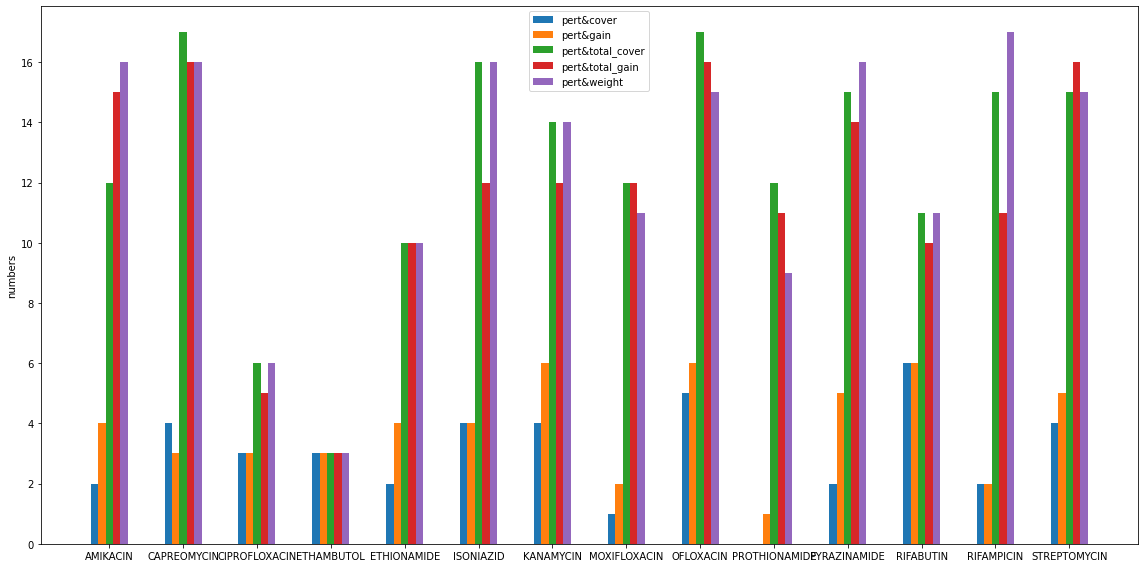

In [132]:
barx = np.arange(len(drug))-0.2    # x坐标
width = 0; wid = 0.1
label_y = res.columns

plt.figure(figsize=(16,8))
for i in range(len(impt)):  # 遍历每个yj的系数
    plt.bar(barx+width, res2.iloc[:, i], width=wid, label=label_y[i])
    width += wid            # 
plt.xticks(range(len(drug)), drug)
plt.ylabel("numbers")
plt.legend()
plt.tight_layout()
plt.savefig("pert&impt&gene.png", bbox_inches='tight',dpi=300)
plt.show()